## Gathering Lyric Data

In [1]:
#web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
import re

#scrapes lyric data specifically from https://genius.com/#top-songs
def url_to_lyrics(url):
    #return lyric data
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    title = [h1.text for h1 in soup.find(class_="header_with_cover_art-primary_info").find_all('h1')]
    lyrics = [p.text for p in soup.find(class_="lyrics").find_all('p')]
    return lyrics

def url_to_artist(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    artist = [h2.text for h2 in soup.find(class_="header_with_cover_art-primary_info").find_all('h2')]
    return artist

    
urls = [
    "https://genius.com/Ariana-grande-positions-lyrics",
    "https://genius.com/Slava-marlow-by-the-eyes-lyrics",
    "https://genius.com/Moneybagg-yo-said-sum-remix-lyrics",
    "https://genius.com/Justin-bieber-and-benny-blanco-lonely-lyrics",
    "https://genius.com/Bts-dynamite-lyrics",
    "https://genius.com/Larray-canceled-lyrics",
    "https://genius.com/Corpse-and-savage-ga-p-e-girls-are-ruining-my-life-lyrics",
    "https://genius.com/Luke-combs-forever-after-all-lyrics",
    "https://genius.com/Internet-money-lemonade-lyrics",
    "https://genius.com/Jack-harlow-tyler-herro-lyrics",
    "https://genius.com/Cardi-b-wap-lyrics",
    "https://genius.com/Twice-i-cant-stop-me-lyrics",
    "https://genius.com/Little-mix-sweet-melody-lyrics",
    "https://genius.com/The-kid-laroi-so-done-lyrics"
]

In [2]:
#gathering lyrics and artists
lyrics = [url_to_lyrics(u) for u in urls]
artists = [url_to_artist(u) for u in urls]

## Cleaning Data

In [3]:
artists

[['\nAriana Grande\n'],
 ['\nSLAVA MARLOW\n'],
 ['\nMoneybagg Yo\n'],
 ['\nJustin Bieber & benny blanco\n'],
 ['\nBTS (방탄소년단)\n'],
 ['\nLarray\n'],
 ['\nCORPSE & Savage Ga$p\n'],
 ['\nLuke Combs\n'],
 ['\nInternet Money\n'],
 ['\nJack Harlow\n'],
 ['\nCardi B\n'],
 ['\nTWICE\n'],
 ['\nLittle Mix\n'],
 ['\nThe Kid LAROI\n']]

In [4]:
def format_artist(artist_name):
    name = str(artist_name)
    name = re.sub("[\W_]","", name)[2:-1]
    return name

In [5]:
formatted_artists = []
for artist in enumerate(artists): 
    formatted_artists.append(format_artist(artist))
formatted_artists

['ArianaGrande',
 'SLAVAMARLOW',
 'MoneybaggYo',
 'JustinBieberbennyblanco',
 'BTS방탄소년단',
 'Larray',
 'CORPSESavageGap',
 'LukeCombs',
 'InternetMoney',
 'JackHarlow',
 'nCardiB',
 'nTWICE',
 'nLittleMix',
 'nTheKidLAROI']

In [6]:
data = {}
for i, artist in enumerate(formatted_artists):
    data[artist] = lyrics[i]

In [7]:
data.keys()

dict_keys(['ArianaGrande', 'SLAVAMARLOW', 'MoneybaggYo', 'JustinBieberbennyblanco', 'BTS방탄소년단', 'Larray', 'CORPSESavageGap', 'LukeCombs', 'InternetMoney', 'JackHarlow', 'nCardiB', 'nTWICE', 'nLittleMix', 'nTheKidLAROI'])

In [8]:
def combine_text(list_of_text):
    combined_text = " ".join(list_of_text)
    return combined_text

In [9]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

#### Converting Cleaned Data into Dataframe

In [10]:
import pandas as pd
import string 
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['lyrics']
data_df = data_df.sort_index()
data_df

,lyrics
ArianaGrande,"[Verse 1]\nHeaven sent you to me\nI'm just hopin’ I don't repeat history\n\n[Pre-Chorus]\nBoy, I'm tryna meet your mama on a Sunday\nThen make a l..."
BTS방탄소년단,"[Intro: Jungkook]\n'Cause I, I, I'm in the stars tonight\nSo watch me bring the fire and set the night alight\n\n[Verse 1: Jungkook]\nShoes on, ge..."
CORPSESavageGap,"[Chorus: CORPSE]\nChoke me like you hate me, but you love me\nLow-key wanna date me when you fuck me (Uwu)\nTouch me with the lights off and my ch..."
InternetMoney,"[Pre-Chorus: Don Toliver]\nXanny bars, suicide door, brand new bag\nCollege girls give a nigga head in my Rafs\nRockstar life, so much money it'll..."
JackHarlow,[Intro]\nYeah\n\n[Chorus]\nThe ones that hate me the most look just like me\nYou tell me what that means\nMake a slick comment and see what that b...
JustinBieberbennyblanco,"[Verse 1]\nEverybody knows my name now\nBut somethin' 'bout it still feels strange\nLike lookin' in a mirror, tryna steady yourself\nAnd seein' so..."
Larray,"[Intro]\n(Internet Money, bitch)\n\n[Verse 1]\nLet's start off with Bryce Hall, yeah, he got some smelly balls\nBitch, I only know his name, 'caus..."
LukeCombs,[Verse 1]\nA cold beer's got twelve ounces\nA good truck's got maybe three hundred thousand\nYou only get so much until it's gone\nDuracells in a ...
MoneybaggYo,"[Intro: JT]\nYeah (Turn me up, YC)\nJT\n\n[Verse 1: JT]\nUh, fuck nigga, I don't wanna hear it (Nah)\nAin't talkin' the bag, I cover my ears\nI ho..."
SLAVAMARLOW,"[Текст песни «По глазам»]\n\n[Куплет 1]\nЯ всё вижу по глазам\nЧто ты хочешь мне сказать\n(На-на-на-на)\n(А-а-а)\nЯ не буду тебя знать\nА ты меня,..."


#### Further Data Cleaning

In [11]:
def clean_lyrics(full_lyrics):
    cleaned_lyrics = full_lyrics.lower()
    cleaned_lyrics = re.sub('\[.*?\]', '', cleaned_lyrics)
    cleaned_lyrics = re.sub('[%s]' % re.escape(string.punctuation), '', cleaned_lyrics)
    cleaned_lyrics = re.sub('\w*\d\w*', '', cleaned_lyrics)
    cleaned_lyrics = re.sub('[‘’“”…]', '', cleaned_lyrics)
    cleaned_lyrics = re.sub('\n', '', cleaned_lyrics)
    return cleaned_lyrics

In [12]:
data_clean = pd.DataFrame(data_df.lyrics.apply(clean_lyrics))
data_clean

,lyrics
ArianaGrande,heaven sent you to meim just hopin i dont repeat historyboy im tryna meet your mama on a sundaythen make a lotta love on a monday ah ahnever need ...
BTS방탄소년단,cause i i im in the stars tonightso watch me bring the fire and set the night alightshoes on get up in the morncup of milk lets rock and rollking ...
CORPSESavageGap,choke me like you hate me but you love melowkey wanna date me when you fuck me uwutouch me with the lights off and my chains onbaby im not the rig...
InternetMoney,xanny bars suicide door brand new bagcollege girls give a nigga head in my rafsrockstar life so much money itll make you laugh heythese bitches th...
JackHarlow,yeahthe ones that hate me the most look just like meyou tell me what that meansmake a slick comment and see what that bringsi seen it go down we c...
JustinBieberbennyblanco,everybody knows my name nowbut somethin bout it still feels strangelike lookin in a mirror tryna steady yourselfand seein somebody elseand everyth...
Larray,internet money bitchlets start off with bryce hall yeah he got some smelly ballsbitch i only know his name cause addison gave him famenow moving o...
LukeCombs,a cold beers got twelve ouncesa good trucks got maybe three hundred thousandyou only get so much until its goneduracells in a maglitea needle drop...
MoneybaggYo,yeah turn me up ycjtuh fuck nigga i dont wanna hear it nahaint talkin the bag i cover my earsi hop in the lamb im switchin the gears skrrtmy bitch...
SLAVAMARLOW,я всё вижу по глазамчто ты хочешь мне сказатьнанананаааая не буду тебя знатьа ты меня и мы друг другапод ногами лёд и в сердце лёдв стакане лёд я ...


Using CountVectorizer, we can remove stop words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,accurate,act,acting,addison,addylips,ageand,ah,ahdoodoo,ahhe,ahhow,...,있나,있잖아결국에는,있잖아근데,있잖아이러고,점점,짜릿한,짜릿해,참을,척해,추월해out
ArianaGrande,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTS방탄소년단,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CORPSESavageGap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
InternetMoney,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JackHarlow,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JustinBieberbennyblanco,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Larray,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LukeCombs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MoneybaggYo,1,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
SLAVAMARLOW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA)


## Questions
Top Words,
Vocabulary,
Amount of profanity

#### Top Words

In [14]:
data_dtm = data_dtm.transpose()
data_dtm.head()

,ArianaGrande,BTS방탄소년단,CORPSESavageGap,InternetMoney,JackHarlow,JustinBieberbennyblanco,Larray,LukeCombs,MoneybaggYo,SLAVAMARLOW,nCardiB,nLittleMix,nTWICE,nTheKidLAROI
accurate,0,0,0,0,0,0,0,0,1,0,0,0,0,0
act,0,0,0,0,1,0,0,0,0,0,0,0,0,0
acting,0,0,0,0,0,0,0,0,0,0,0,1,0,0
addison,0,0,0,0,0,0,1,0,0,0,0,0,0,0
addylips,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
# Find the top 30 words said by each artist
top_dict = {}
for artist in data_dtm.columns:
    top = data_dtm[artist].sort_values(ascending=False).head(30)
    top_dict[artist]= list(zip(top.index, top.values))

top_dict

{'ArianaGrande': [('im', 17),
  ('love', 7),
  ('wouldnt', 6),
  ('jumpin', 6),
  ('olympics', 5),
  ('switchin', 5),
  ('infinite', 5),
  ('wont', 5),
  ('kitchen', 5),
  ('nothin', 5),
  ('bedroomim', 5),
  ('way', 5),
  ('positions', 4),
  ('youcookin', 4),
  ('kinda', 4),
  ('youre', 4),
  ('hoopsknow', 4),
  ('dothat', 4),
  ('dont', 4),
  ('ah', 3),
  ('good', 2),
  ('mama', 2),
  ('yeah', 2),
  ('tryna', 2),
  ('lotta', 2),
  ('runnin', 2),
  ('beswitchin', 2),
  ('want', 2),
  ('youthis', 2),
  ('shit', 2)],
 'BTS방탄소년단': [('like', 13),
  ('im', 12),
  ('nana', 12),
  ('dynamite', 7),
  ('light', 7),
  ('night', 6),
  ('funk', 6),
  ('city', 6),
  ('little', 6),
  ('ima', 6),
  ('soulso', 6),
  ('watch', 5),
  ('alight', 5),
  ('life', 5),
  ('tonightso', 5),
  ('bring', 5),
  ('set', 5),
  ('stars', 5),
  ('nanananana', 4),
  ('ayydynnanana', 4),
  ('nanana', 4),
  ('dynamitedynnanana', 4),
  ('ohshining', 2),
  ('ayylight', 2),
  ('honey', 2),
  ('goim', 2),
  ('know', 2),
  (

In [16]:
# Print the top 30 words said by each artist
for artist, top_words in top_dict.items():
    print(artist)
    print(', '.join([word for word, count in top_words[0:31]]))
    print('---')

ArianaGrande
im, love, wouldnt, jumpin, olympics, switchin, infinite, wont, kitchen, nothin, bedroomim, way, positions, youcookin, kinda, youre, hoopsknow, dothat, dont, ah, good, mama, yeah, tryna, lotta, runnin, beswitchin, want, youthis, shit
---
BTS방탄소년단
like, im, nana, dynamite, light, night, funk, city, little, ima, soulso, watch, alight, life, tonightso, bring, set, stars, nanananana, ayydynnanana, nanana, dynamitedynnanana, ohshining, ayylight, honey, goim, know, chaching, beat, cause
---
CORPSESavageGap
like, fuck, im, bitch, love, hate, know, lights, melowkey, wanna, want, kill, grab, bad, girl, wait, said, death, onefuck, onbaby, right, chains, date, lassosayin, cat, tryna, let, dye, lifebat, patch
---
InternetMoney
got, ice, lemonade, neck, juice, coupe, hey, life, money, yeah, codeine, bars, nigga, woke, head, make, new, suicide, bagcollege, hate, laugh, juicecopped, itll, drippinice, trippin, bitches, heythese, heyoff, roof, door
---
JackHarlow
like, got, im, nsync, know,

In [17]:
#Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for artist in data_dtm.columns:
    top = [word for (word, count) in top_dict[artist]]
    for t in top:
        words.append(t)
        
words

['im',
 'love',
 'wouldnt',
 'jumpin',
 'olympics',
 'switchin',
 'infinite',
 'wont',
 'kitchen',
 'nothin',
 'bedroomim',
 'way',
 'positions',
 'youcookin',
 'kinda',
 'youre',
 'hoopsknow',
 'dothat',
 'dont',
 'ah',
 'good',
 'mama',
 'yeah',
 'tryna',
 'lotta',
 'runnin',
 'beswitchin',
 'want',
 'youthis',
 'shit',
 'like',
 'im',
 'nana',
 'dynamite',
 'light',
 'night',
 'funk',
 'city',
 'little',
 'ima',
 'soulso',
 'watch',
 'alight',
 'life',
 'tonightso',
 'bring',
 'set',
 'stars',
 'nanananana',
 'ayydynnanana',
 'nanana',
 'dynamitedynnanana',
 'ohshining',
 'ayylight',
 'honey',
 'goim',
 'know',
 'chaching',
 'beat',
 'cause',
 'like',
 'fuck',
 'im',
 'bitch',
 'love',
 'hate',
 'know',
 'lights',
 'melowkey',
 'wanna',
 'want',
 'kill',
 'grab',
 'bad',
 'girl',
 'wait',
 'said',
 'death',
 'onefuck',
 'onbaby',
 'right',
 'chains',
 'date',
 'lassosayin',
 'cat',
 'tryna',
 'let',
 'dye',
 'lifebat',
 'patch',
 'got',
 'ice',
 'lemonade',
 'neck',
 'juice',
 'coup

In [18]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 9),
 ('im', 7),
 ('know', 7),
 ('yeah', 6),
 ('got', 6),
 ('dont', 5),
 ('love', 4),
 ('tryna', 4),
 ('said', 4),
 ('just', 4),
 ('ah', 3),
 ('want', 3),
 ('shit', 3),
 ('bitch', 3),
 ('wanna', 3),
 ('right', 3),
 ('thats', 3),
 ('aint', 3),
 ('wont', 2),
 ('way', 2),
 ('good', 2),
 ('life', 2),
 ('cause', 2),
 ('fuck', 2),
 ('hate', 2),
 ('let', 2),
 ('nigga', 2),
 ('make', 2),
 ('new', 2),
 ('bitches', 2),
 ('tell', 2),
 ('yall', 2),
 ('seen', 2),
 ('say', 2),
 ('bout', 2),
 ('look', 2),
 ('fuckin', 2),
 ('thought', 2),
 ('tiny', 2),
 ('pussy', 2),
 ('need', 2),
 ('wouldnt', 1),
 ('jumpin', 1),
 ('olympics', 1),
 ('switchin', 1),
 ('infinite', 1),
 ('kitchen', 1),
 ('nothin', 1),
 ('bedroomim', 1),
 ('positions', 1),
 ('youcookin', 1),
 ('kinda', 1),
 ('youre', 1),
 ('hoopsknow', 1),
 ('dothat', 1),
 ('mama', 1),
 ('lotta', 1),
 ('runnin', 1),
 ('beswitchin', 1),
 ('youthis', 1),
 ('nana', 1),
 ('dynamite', 1),
 ('light', 1),
 ('night', 1),
 ('funk', 1),
 ('city', 1),
 ('li

In [19]:
# If more than half of the artists have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like', 'im', 'know']

In [20]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [21]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: num must be 1 <= num <= 12, not 13

/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.

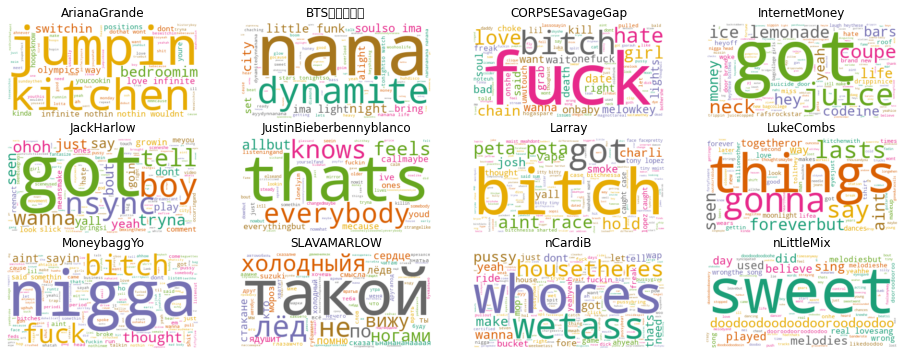

In [22]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, artist in enumerate(data_dtm.columns):
    wc.generate(data_clean.lyrics[artist])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_dtm.columns[index])
    
plt.show()

##### Findings

1. A lot of artists use profanity in their music.

#### Number of Words


In [23]:
# Find the number of unique words that each artist uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for artist in data_dtm.columns:
    uniques = data_dtm[artist].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data_dtm.columns, unique_list)), columns=['artist', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,artist,unique_words
13,nTheKidLAROI,61
5,JustinBieberbennyblanco,63
0,ArianaGrande,71
9,SLAVAMARLOW,81
7,LukeCombs,83
11,nLittleMix,94
1,BTS방탄소년단,98
2,CORPSESavageGap,110
12,nTWICE,118
4,JackHarlow,158


In [24]:
# Calculate the words per minute of each artist

# Find the total number of words that a artist uses
total_list = []
for artist in data_dtm.columns:
    totals = sum(data_dtm[artist])
    total_list.append(totals)
    
# Average song duration in terms of minutes
avg_songdur = 4.2

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['words_per_minute'] = data_words['total_words'] / avg_songdur

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,artist,unique_words,total_words,words_per_minute
5,JustinBieberbennyblanco,63,81,19.285714
13,nTheKidLAROI,61,95,22.619048
9,SLAVAMARLOW,81,127,30.238095
7,LukeCombs,83,135,32.142857
2,CORPSESavageGap,110,149,35.476190
0,ArianaGrande,71,177,42.142857
11,nLittleMix,94,209,49.761905
1,BTS방탄소년단,98,243,57.857143
6,Larray,172,256,60.952381
12,nTWICE,118,265,63.095238


/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.

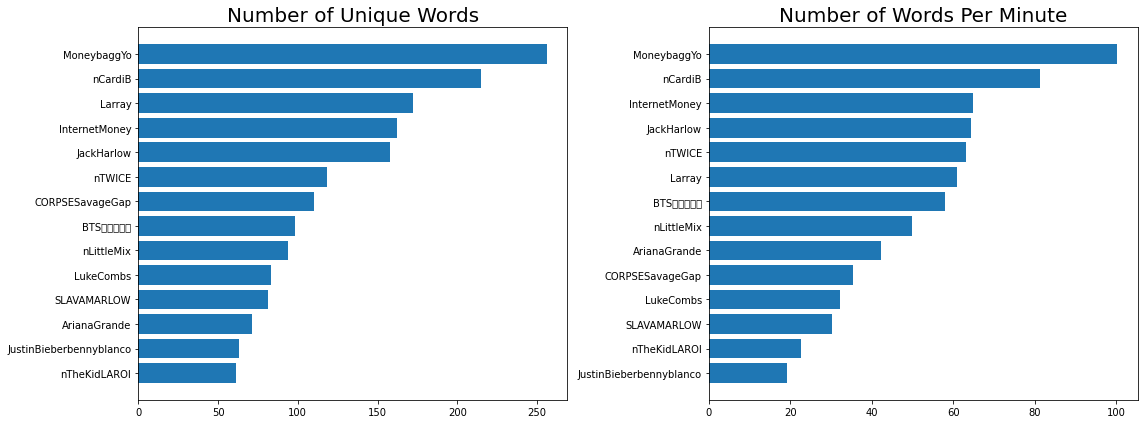

In [25]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.artist)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.artist)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Amount of Profanity

In [26]:
# Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 9),
 ('im', 7),
 ('know', 7),
 ('yeah', 6),
 ('got', 6),
 ('dont', 5),
 ('love', 4),
 ('tryna', 4),
 ('said', 4),
 ('just', 4),
 ('ah', 3),
 ('want', 3),
 ('shit', 3),
 ('bitch', 3),
 ('wanna', 3),
 ('right', 3),
 ('thats', 3),
 ('aint', 3),
 ('wont', 2),
 ('way', 2),
 ('good', 2),
 ('life', 2),
 ('cause', 2),
 ('fuck', 2),
 ('hate', 2),
 ('let', 2),
 ('nigga', 2),
 ('make', 2),
 ('new', 2),
 ('bitches', 2),
 ('tell', 2),
 ('yall', 2),
 ('seen', 2),
 ('say', 2),
 ('bout', 2),
 ('look', 2),
 ('fuckin', 2),
 ('thought', 2),
 ('tiny', 2),
 ('pussy', 2),
 ('need', 2),
 ('wouldnt', 1),
 ('jumpin', 1),
 ('olympics', 1),
 ('switchin', 1),
 ('infinite', 1),
 ('kitchen', 1),
 ('nothin', 1),
 ('bedroomim', 1),
 ('positions', 1),
 ('youcookin', 1),
 ('kinda', 1),
 ('youre', 1),
 ('hoopsknow', 1),
 ('dothat', 1),
 ('mama', 1),
 ('lotta', 1),
 ('runnin', 1),
 ('beswitchin', 1),
 ('youthis', 1),
 ('nana', 1),
 ('dynamite', 1),
 ('light', 1),
 ('night', 1),
 ('funk', 1),
 ('city', 1),
 ('li

In [27]:
# Let's isolate just these bad words
data_bad_words = data_dtm.transpose()[['fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ArianaGrande,1,2
BTS방탄소년단,0,0
CORPSESavageGap,6,0
InternetMoney,0,0
JackHarlow,0,0
JustinBieberbennyblanco,0,0
Larray,1,1
LukeCombs,0,0
MoneybaggYo,7,4
SLAVAMARLOW,0,0


/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/josedominguez/Desktop/nlp_notebook/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.

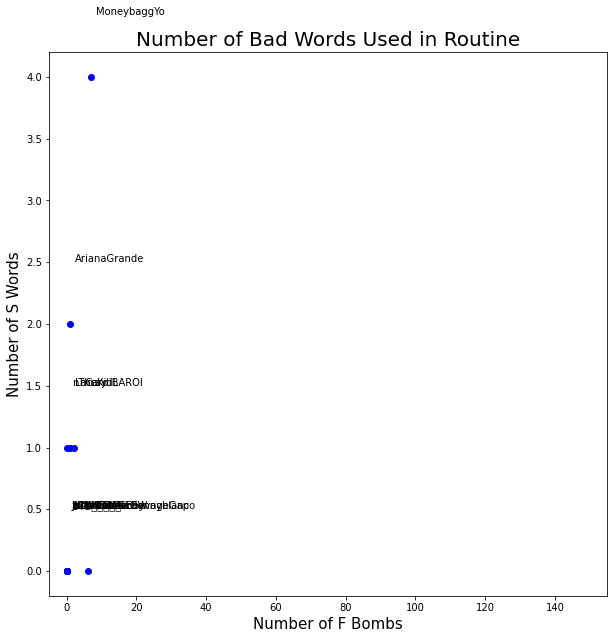

In [28]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 10]

for i, artist in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[artist]
    y = data_profanity.s_word.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, data_dtm.columns[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

# Sentiment Analysis

In [30]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['lyrics'].apply(pol)
data_clean['subjectivity'] = data_clean['lyrics'].apply(sub)
data_clean

,lyrics,polarity,subjectivity
ArianaGrande,heaven sent you to meim just hopin i dont repeat historyboy im tryna meet your mama on a sundaythen make a lotta love on a monday ah ahnever need ...,0.058444,0.538889
BTS방탄소년단,cause i i im in the stars tonightso watch me bring the fire and set the night alightshoes on get up in the morncup of milk lets rock and rollking ...,0.143000,0.572000
CORPSESavageGap,choke me like you hate me but you love melowkey wanna date me when you fuck me uwutouch me with the lights off and my chains onbaby im not the rig...,-0.134694,0.628798
InternetMoney,xanny bars suicide door brand new bagcollege girls give a nigga head in my rafsrockstar life so much money itll make you laugh heythese bitches th...,0.009349,0.475443
JackHarlow,yeahthe ones that hate me the most look just like meyou tell me what that meansmake a slick comment and see what that bringsi seen it go down we c...,0.033492,0.364748
JustinBieberbennyblanco,everybody knows my name nowbut somethin bout it still feels strangelike lookin in a mirror tryna steady yourselfand seein somebody elseand everyth...,-0.045238,0.436905
Larray,internet money bitchlets start off with bryce hall yeah he got some smelly ballsbitch i only know his name cause addison gave him famenow moving o...,-0.036786,0.464603
LukeCombs,a cold beers got twelve ouncesa good trucks got maybe three hundred thousandyou only get so much until its goneduracells in a maglitea needle drop...,0.135909,0.374030
MoneybaggYo,yeah turn me up ycjtuh fuck nigga i dont wanna hear it nahaint talkin the bag i cover my earsi hop in the lamb im switchin the gears skrrtmy bitch...,-0.117262,0.526504
SLAVAMARLOW,я всё вижу по глазамчто ты хочешь мне сказатьнанананаааая не буду тебя знатьа ты меня и мы друг другапод ногами лёд и в сердце лёдв стакане лёд я ...,0.000000,0.000000


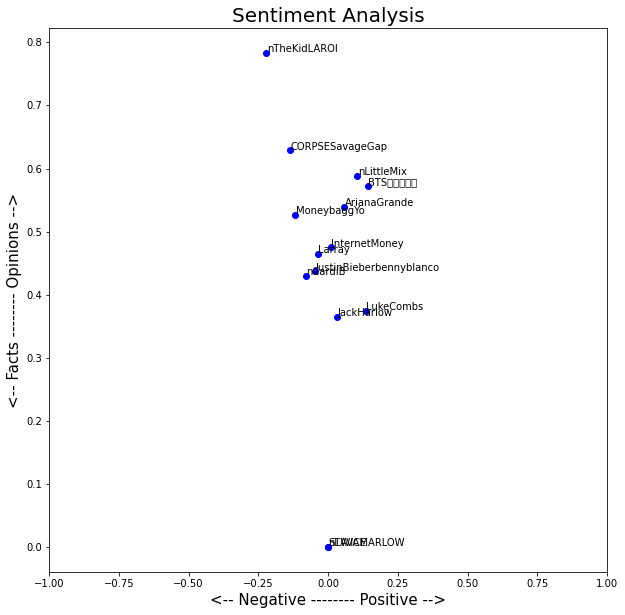

In [42]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, artist in enumerate(data_clean.index):
    x = data_clean.polarity.loc[artist]
    y = data_clean.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_clean.index[index], fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()